In [1]:
from platform import python_version

print(python_version())

3.8.8


# Make sure the version of anaconda is the latest 

In [2]:
import sklearn  # importing sklearn
print(sklearn.__version__)  # printing sklearn version

0.24.1


## Importing the relevent libraries

In [3]:
import nltk # importing natural language processing toolkit 
from nltk.corpus import stopwords  # helps remove stopwords
from nltk.stem import WordNetLemmatizer # lemmantizes words
from nltk.corpus import wordnet  # will be used to replace words with there antonyms
from nltk.stem import PorterStemmer  # stemms words

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Importing the relevent libraries

In [7]:
import numpy as np  # Allows us to work with arrays.
import pandas as pd  # importing pandas’ library for use. Allows us to import data set and manipulate it.
import string  # import string library function
import re  # works with Regular Expressions
import pickle  # allows to open and save to files
from nltk.tokenize import word_tokenize  # tokenizes sentences.

import seaborn as sns  # Allows to polt beautiful plots.
import matplotlib.pyplot as plt  # Allows working with plots.
from mpl_toolkits import mplot3d  # plotting 3d plots

from sklearn.compose import ColumnTransformer  # helps with encoding.
from sklearn.preprocessing import OneHotEncoder  # Does onehotencode.
from sklearn.preprocessing import LabelEncoder   # Does 1 and 0 encoding.
from sklearn.model_selection import train_test_split  # Splits dataset into test set and traning set. 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer  # Perform the feature scaling.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix  # creates a 
from sklearn.naive_bayes import GaussianNB  # applies  naive_bayes gaussianNB.
from sklearn.tree import DecisionTreeClassifier  # applies  decision tree classification model.                                                                            # confusion matrix  # creates a confusion matrix
    
from sklearn.metrics import accuracy_score  # Returns accury score of a model.
from collections import Counter  # Allows the counting the items in an iterable list.

from sklearn.model_selection import cross_val_score  # performs cross validation. Helps in model selection.
from sklearn.model_selection import GridSearchCV  # helps select the best hyper parameters
# from imblearn.over_sampling import RandomOverSampler  # Uses over sampling techniques to Sample the data correctly.
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, roc_auc_score, f1_score 
                                                                                 # Allows the usage of a classification report
    
from sklearn.metrics import precision_recall_fscore_support  # gives precison, recall, f1 score, and support
from sklearn.model_selection import RandomizedSearchCV  # performs randomized search cv


import warnings  # allows to ignore warnings
warnings.filterwarnings("ignore")  # ignores warnings

#%matplotlib inline  # helps in showing plots on the browser.### Importing the relevent libraries

## Importing the dataframe

In [8]:
DataFrame = pd.read_csv("FinalBalancedDataset.csv")  # opens csv files and assighns them to a variable.

# Checking the data from the dataframe before pre-processing

In [9]:
DataFrame.head(5)  # Taking a look at the dataframe the first elements of the dataset.

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [10]:
DataFrame = DataFrame.drop('Unnamed: 0', 1)  # column is dropped

In [11]:
DataFrame.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Toxicity  56745 non-null  int64 
 1   tweet     56745 non-null  object
dtypes: int64(1), object(1)
memory usage: 886.8+ KB


## 1. Data pre-processing

In [12]:
DataFrame.shape  # The Entries and the columns of the dataframe are viewed.

(56745, 2)

## Dealing with null values

<AxesSubplot:>

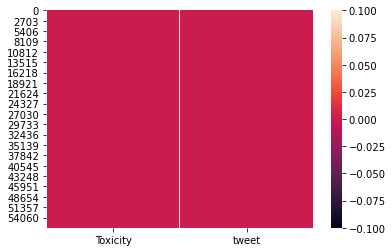

In [13]:
sns.heatmap(DataFrame.isnull())  # shows null values

In [14]:
DataFrame.isnull().sum()  # Checking the dataframe for null values.

Toxicity    0
tweet       0
dtype: int64

## Dealing with duplicates

In [15]:
DataFrame.drop_duplicates(inplace = True)  # checks for duplicates and removes them

In [16]:
print(DataFrame.pivot_table(columns=['Toxicity'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Toxicity
0    30389
1    23924
dtype: int64


In [17]:
DataFrame.info()  # checking basic information on dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54313 entries, 0 to 56744
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Toxicity  54313 non-null  int64 
 1   tweet     54313 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


## Balancing DataFrame

In [18]:
print(DataFrame.pivot_table(columns=['Toxicity'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Toxicity
0    30389
1    23924
dtype: int64


In [19]:
zero = str(round(100 * (30389/56745),2)) + "%"   # percentage of the value is checked from label column.
one  = str(round(100 * (23924/56745),2)) + "%"  # percentage of the value is checked from label column.

In [20]:
print("0 is represented ", zero, "\n1 is represented ", one)
# percentage of the value is printed of label column.

0 is represented  53.55% 
1 is represented  42.16%


In [21]:
30389 - 23924

6465

In [22]:
row_to_remove = np.random.RandomState(1).choice(DataFrame[DataFrame['Toxicity']==0].index,size=6465,replace=False)
DataFrame = DataFrame.drop(row_to_remove)

In [23]:
print(DataFrame.pivot_table(columns=['Toxicity'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Toxicity
0    23924
1    23924
dtype: int64


# Reseting index

In [24]:
DataFrame.reset_index(drop=True, inplace=True)  # reseting index.

In [25]:
DataFrame

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,#model i love u take with u all the time in ...
3,0,factsguide: society now #motivation
4,0,[2/2] huge fan fare and big talking before the...
...,...,...
47843,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
47844,1,"you've gone and broke the wrong heart baby, an..."
47845,1,young buck wanna eat!!.. dat nigguh like I ain...
47846,1,youu got wild bitches tellin you lies


In [26]:
DataFrame.info()  # checking basic information on dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47848 entries, 0 to 47847
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Toxicity  47848 non-null  int64 
 1   tweet     47848 non-null  object
dtypes: int64(1), object(1)
memory usage: 747.8+ KB


## removing non word symbols

In [27]:
DataFrame['tweet'] = DataFrame['tweet'].str.replace('[^\w\s]','')
DataFrame.head()

,Toxicity,tweet
0,0,user when a father is dysfunctional and is so...
1,0,user user thanks for lyft credit i cant use ca...
2,0,model i love u take with u all the time in u...
3,0,factsguide society now motivation
4,0,22 huge fan fare and big talking before they l...


## Label Encoding

In [28]:
le = LabelEncoder()  # creating the instance of the object.
DataFrame.Toxicity = le.fit_transform(DataFrame.Toxicity)  # label encoing the require dcolumn.

## Spliting X and y variables.

In [29]:
X = DataFrame.iloc[:, -1].values  # selecting the values for the X variable.

In [30]:
y = DataFrame.iloc[:, :-1].values # selecting the values for the Y variable. # done using .to_numpy and not 
                                                       # .iloc as .to_numpy creates a horizontal bar while .iloc creates a 
                                                       # horizontal bar which will not alighn with the x values.

In [31]:
print("X ", X, "y ", y)  # priting arrays

X  [' user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run'
 'user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx    disapointed getthanked'
 'model   i love u take with u all the time in urð ðððð\x85ððð  ' ...
 'young buck wanna eat dat nigguh like I aint fuckin dis up again'
 'youu got wild bitches tellin you lies'
 'Ruffled  Ntac Eileen Dahlia  Beautiful color combination of pink orange yellow amp white A Coll httptcoH0dYEBvnZB'] y  [[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [0]]


## Removing punctuations, special character and converting text to lower case

In [32]:
no_punctuation_and_no_stop_words = []
for i in range(0,len(X)):
  # removing non word symbols
  data = re.sub(r'\W',' ', str(X[i]))
  # converting the data to lower case
  data = data.lower()
  # removing single characters
  data = re.sub(r'\s+[a-z]\s+', ' ', data)
  # removing single characters at the start of a sentence
  data = re.sub(r'^[a-z]\s+',' ',data)
  #replacing everything other than alphabets with a space
  data =re.sub("[^a-zA-Z]"," ",data)
  # removing extra spaces
  data = re.sub(r'\s+',' ', data)
  no_punctuation_and_no_stop_words.append(data)

In [33]:
no_punctuation_and_no_stop_words

[' user when father is dysfunctional and is so selfish he drags his kids into his dysfunction run',
 'user user thanks for lyft credit cant use cause they dont offer wheelchair vans in pdx disapointed getthanked',
 'model love take with all the time in ur ',
 ' factsguide society now motivation',
 ' huge fan fare and big talking before they leave chaos and pay disputes when they get there allshowandnogo ',
 ' user camping tomorrow user user user user user user user danny ',
 'the next school year is the year for exams cant think about that school exams hate imagine actorslife revolutionschool girl',
 'we won love the land allin cavs champions cleveland clevelandcavaliers ',
 ' user user welcome here im its so gr ',
 ' ireland consumer price index mom climbed from previous to in may blog silver gold forex',
 ' get to see my daddy today days gettingfed',
 'user cnn calls michigan middle school build the wall chant tcot ',
 'no comment in australia opkillingbay seashepherd helpcovedolphin

## Removing stop words

In [34]:
# removing stop words
tokenized_words = [word_tokenize(str(i)) for i in no_punctuation_and_no_stop_words]
stopset = set(stopwords.words('english'))
clean_model = []
for m in range(len(tokenized_words)):
      stop_m = [i for i in tokenized_words[m] if i not in stopset]
      clean_model.append(' '.join(stop_m))

## Clean sentences model

In [35]:
clean_model

['user father dysfunctional selfish drags kids dysfunction run',
 'user user thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked',
 'model love take time ur',
 'factsguide society motivation',
 'huge fan fare big talking leave chaos pay disputes get allshowandnogo',
 'user camping tomorrow user user user user user user user danny',
 'next school year year exams cant think school exams hate imagine actorslife revolutionschool girl',
 'love land allin cavs champions cleveland clevelandcavaliers',
 'user user welcome im gr',
 'ireland consumer price index mom climbed previous may blog silver gold forex',
 'get see daddy today days gettingfed',
 'user cnn calls michigan middle school build wall chant tcot',
 'comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins',
 'ouchjunior angry got junior yugyoem omg',
 'thankful paner thankful positive',
 'retweet agree',
 'friday smiles around via ig user user cookies make people',
 

## Replacing words starting with not with there antonym (Will do after to see if further improvements can be made)

In [36]:
"""
tokenized_words = [word_tokenize(str(i)) for i in clean_model]
temp_word = ""
model_after_antonyms_replacement = []
for m in range(len(tokenized_words)):
   final_word = []
   for n in range(len(tokenized_words[m])):
     antonyms = []
     # replacing not with not_
     if tokenized_words[m][n] == "not":
       temp_word = "not_"
     # replacing word starting with not_ with its antonym
     elif temp_word == "not_":
       for sys in wordnet.synsets(tokenized_words[m][n]):  
         for s in sys.lemmas():
           for a in s.antonyms(): 
             antonyms.append(a.name())
       # adding antonym word to original word
       if len(antonyms) >= 1:
           tokenized_words[m][n] = antonyms[0]
       # adding not_ to original word
       else:
         if tokenized_words[m][n] != tokenized_words[m][-1]:
           tokenized_words[m][n+1] = temp_word + tokenized_words[m][n+1]
       temp_word = ""
     if tokenized_words[m][n] != "not":
           final_word.append(tokenized_words[m][n])
   model_after_antonyms_replacement.append(' '.join(final_word))  
   """

'\ntokenized_words = [word_tokenize(str(i)) for i in clean_model]\ntemp_word = ""\nmodel_after_antonyms_replacement = []\nfor m in range(len(tokenized_words)):\n   final_word = []\n   for n in range(len(tokenized_words[m])):\n     antonyms = []\n     # replacing not with not_\n     if tokenized_words[m][n] == "not":\n       temp_word = "not_"\n     # replacing word starting with not_ with its antonym\n     elif temp_word == "not_":\n       for sys in wordnet.synsets(tokenized_words[m][n]):  \n         for s in sys.lemmas():\n           for a in s.antonyms(): \n             antonyms.append(a.name())\n       # adding antonym word to original word\n       if len(antonyms) >= 1:\n           tokenized_words[m][n] = antonyms[0]\n       # adding not_ to original word\n       else:\n         if tokenized_words[m][n] != tokenized_words[m][-1]:\n           tokenized_words[m][n+1] = temp_word + tokenized_words[m][n+1]\n       temp_word = ""\n     if tokenized_words[m][n] != "not":\n           fin

In [37]:
clean_model = model_after_antonyms_replacement
clean_model

NameError: name 'model_after_antonyms_replacement' is not defined

## Lemmatization

In [38]:
tokenized_words = [word_tokenize(str(i)) for i in clean_model]
lemmatizer = WordNetLemmatizer()
lematized_model = []
for m in range(len(tokenized_words)):
      lema_m = [lemmatizer.lemmatize(word) for word in tokenized_words[m]]
      lematized_model.append(' '.join(lema_m))

## Lemmatized model

In [ ]:
lematized_model

In [ ]:
print(lematized_model)

In [ ]:
type(lematized_model)

In [ ]:
type(y)

In [ ]:
len(lematized_model)

In [ ]:
len(y)

In [ ]:
print(y)

In [ ]:
flat_list = [item for sublist in y for item in sublist]
print(len(flat_list))

In [ ]:
NewDf = pd.DataFrame(
    {   'Labels': flat_list,
        'Tweets': lematized_model
     
    })

In [ ]:
NewDf

In [ ]:
print(47848 / 2)
print(23924 / 4)
print(5981+5981)

In [ ]:
d1 = NewDf[NewDf['Labels']==0]

In [ ]:
d1.head(3)

In [ ]:
d2 = NewDf[NewDf['Labels']==1]

In [ ]:
d2.head(3)

In [ ]:
newdf1 = d1.head(500)

In [ ]:
newdf1.shape[0]

In [ ]:
newdf2 = d2.head(500)

In [ ]:
newdf2.shape[0]

In [ ]:
finaldf1 = pd.concat([newdf2, newdf1], ignore_index=True)

In [ ]:
finaldf1.shape[0]

In [ ]:
finaldf1.tail(5)

In [ ]:
finaldf1.head(5)

In [ ]:
finaldf1 = finaldf1.sample(frac=1).reset_index(drop=True)

In [ ]:
finaldf1.head(5)

In [ ]:
freq = sum(pd.Series(' '.join(finaldf1['Tweets']).split()).value_counts())
freq

## Removing the rare words

In [ ]:
# freq = pd.Series(' '.join(finaldf1['Tweets']).split()).value_counts()[-15:]
# freq

In [ ]:
# finaldf1['Tweets'] = finaldf1['Tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
# finaldf1.head()

## Removing the most frequent words

In [ ]:
#freq = pd.Series(' '.join(finaldf1['Tweets']).split()).value_counts()[:55]
#freq

In [ ]:
#sum(freq)

In [ ]:
#finaldf1['Tweets'] = finaldf1['Tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
#finaldf1.head()

## Removing words by occurance

In [ ]:
from collections import Counter
from itertools import chain

# split words into lists
v = finaldf1['Tweets'].str.split().tolist() # [s.split() for s in df['Col2'].tolist()]
# compute global word frequency
c = Counter(chain.from_iterable(v))
# filter, join, and re-assign
finaldf1['Tweets'] = [' '.join([j for j in i if c[j] > 6]) for i in v]


In [ ]:
freq = sum(pd.Series(' '.join(finaldf1['Tweets']).split()).value_counts())
freq

In [ ]:
finaldf1 = finaldf1.sample(frac=1).reset_index(drop=True)

## Spliting X and y variables.

In [ ]:
X = finaldf1.iloc[:, -1].values  # selecting the values for the X variable.

In [ ]:
y = finaldf1.iloc[:, :-1].values # selecting the values for the Y variable. # done using .to_numpy and not 
                                                       # .iloc as .to_numpy creates a horizontal bar while .iloc creates a 
                                                       # horizontal bar which will not alighn with the x values.

In [ ]:
print("X ", X, "y ", y)  # priting arrays

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
# conda install -c anaconda gensim
#!pip install -U gensim

In [ ]:
"""from gensim.models import Word2Vec, KeyedVectors
import nltk
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
embeddingsSize=100
model = Word2Vec(sentences=X_train, vector_size=embeddingsSize, window=5, min_count=1, workers=2)"""

In [ ]:
def Classifier_function(model, X_train, y_train,X_test,y_test, title):  # function takes the name of the 
    
    
  """
    The Classifier_function Checks, predicted/actual results , checks testing and traning scores, 
    Checks Actual values classified correctly and wrongly Checks accuracy, precision, recall,  f1 
    scores and area under the curve.
    It plots a confusion matix with accuracy, precision, recall,  f1 scores given.
    
    The first parameter is model the model to evaluate.
    
    The secound parameter X_train is the variable contaning training datas features.
    
    The third parameter y_train is the variable contaning training datas label.
    
    The fourth parameter X_test is the variable contaning testing datas features.
    
    The fifth parameter y_test is the variable contaning testing datas label.
    
    The sixth parameter is the string which will be used as the title for the confusion matrix.
    
    The Classifier_function function returns the train_accuracy,test_accuracy , precision, recall,
    f1_score and Area_under_the_curve of a given model. 
    
  """


                                                               # model used, the x and y traning and testing sets.
  model.fit(X_train, y_train)  # Building the k-nearest neighbors classification model.

  
  
  

  y_test_p = model.predict(X_test)  # Predicted results.
  print("  results\npred-Actual")  # printing predicted and real values.
  print(np.concatenate((y_test_p.reshape(len(y_test_p),1),y_test.reshape(len(y_test),1)),1))  # Predicted results and 
                                                                                       #  real results in a np array.
   

  train_accuracy = round(model.score(X_train,y_train),2 ) * 100  # Getting traing accuracy multipling it by 100 after 
                                                                # rounding it by 2 to get a score between 0 to 100
  test_accuracy = round(model.score(X_test,y_test),2) * 100  # Getting testing accuracy multipling it by 100 after 
                                                                # rounding it by 2 to get a score between 0 to 100

  print("Model train accuracy: ", train_accuracy, "%")  # printing the model accurcy. 
  print("Model test accuracy: ", test_accuracy, "%")  # printing the model accurcy. 


  print("\n\n")  # printing a new line.
  # getting Accuracy or recall or precision or specificity
  y_test_pred = model.predict(X_test)  # predicted results
  
  cReport = classification_report(y_test,y_test_pred)  # creating a Classification report
  print(cReport)  # creating a Classification report
  
  cm = confusion_matrix(y_test, y_test_p)  # creating the confusion matrix
  cm2 = multilabel_confusion_matrix(y_test, y_test_pred)  # creating a mutable confusion matrix


  precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_test_pred)  # getting the precision,
                                                                                          # recall and f1score for later use.
  accuracy  = round(np.trace(cm) / float(np.sum(cm)), 2) * 100  # getting aaccuracy and multipling it by 100 after 
                                                                # rounding it by 2 to get a score between 0 to 100.
  precision = round(np.mean(precision),2) * 100  # multipling precision variables mean by 100 after rounding it by
                                                #  2 to get a score between 0 to 100.
  recall = round(np.mean(recall),2) * 100  # multipling recall variables mean by 100 after rounding it by 2 to 
                                           # get a score between 0 to 100.
  f1_score = round(np.mean(f1_score),2) * 100  # multipling f1_score variables mean by 100 after rounding 
                                               # it by 2 to get a score between 0 to 100.

  lable_list = []  # creating a empty list

  for i in range(len(cm)):  # looping in the range of the length of the confusion matrix.
    for j in range(len(cm)):  # looping in the range of the length of the confusion matrix.
        if j == i:  # if the value of j is equal to the value of i.
            # the below code appends the Actual Values Classified correctly to the variable lable_list.
            lable_list.append("Actual "+ str(i) +"\n" + "calssified as "+ str(j) +"\n" + str(cm[i][j]) + "\n"+ \
                              str(round(cm[i][j]/np.sum(cm),2)) + " %")

        else:   # otherwise
            #  the below function appends the actual values classified wrongly to the variable lable list.
            lable_list.append("Actual "+ str(i) +"\n" + "calssified as "+ str(j) + "\n"  + str(cm[i][j]) + "\n"+ \
                              str(round(cm[i][j]/np.sum(cm),2)) + " %")

            
  lable_list = np.asarray(lable_list).reshape(len(cm),len(cm))  # resahping the label list as a numpy array to be 
                                                                # used in plotting the confusion matrix
  
  #  the variable function will be will be used to display the results of the evaluation to the confusion matrix.
  total_score = ("Accuracy:   " + str(accuracy) +" %" + "\nPrecison:    "  + str(precision)  +" %" + "\nRecall:        " +\
                 str(recall)  +" %" + "\nF1 score:    "  + str(f1_score) +" %") 


  # Below is the code used to plot the confusion matrix.
  plt.figure()  # sets the size of the matrix
  disp = sns.heatmap(cm, annot=lable_list, fmt='', cmap='Blues')  # displays the results of the actual values 
                                                                 #  classified wrongly and correctly.                       
  disp.plot()  # displaying data in plot
  plt.title(title, fontsize=25)  # adding a title to plot
  plt.ylabel('True label', fontsize=20)  # adding a y axis to the plot.
  plt.xlabel('Predicted label' +"\n\nScores\n" +total_score, fontsize=20)  # adding a x axis to the plot
  plt.show()  # showing the plot


  plt.figure()
  fpr, tpr, _ =  metrics.roc_curve(y_test,  y_test_pred)
  auc = metrics.roc_auc_score(y_test, y_test_pred)
  plt.plot(fpr,tpr,label= title +", auc="+str(auc))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc=4)
  plt.show()
    
  print("Area under the curve: ", auc) 
    
  result_list = train_accuracy,test_accuracy , precision, recall, f1_score,auc  # returning the results



  

  return result_list  # returns the results from the model.

# Sub function to preform Grid Search

In [ ]:
solver_list = ['svd', 'lsqr', 'eigen']
shrinkage_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
n_components_list = [None, 1, 2, 5, 8, 13, 21, 34, 55]
store_covariance_list =  [True, False]
tol_list = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]

para_grid = dict(shrinkage = shrinkage_list, solver = solver_list, n_components = n_components_list, store_covariance = store_covariance_list, tol = tol_list)  # adding the above 

In [ ]:
def rand_search_fun(typeofmodelandprams, dict_prams,crossval, X, y):  # Function takes in the model type, 
                                                            # number of crossvalidation sand X and y values as hyperparameters.
        

    """
    The function rand_search_fun performs random search on a model. It prints the best results and 
    the hyperparametrs used to obtain those results and then it plots those results.
    
    The first parameter typeofmodelandprams is the type of model used on which random search is performed on.
    
    The secound parameter dict_prams is a dictinory of hyperparameters to be used in the random search.
    
    The third parameter crossval is the number of cross validations to be performed.
    
    The fourth parameter X is the features.
    
    The fifth parameter y is the labels.
    
    
    The function rand_search_fun returns the results of the random search.
    
    """

    model = typeofmodelandprams  # creating an instance of the object.
    parameters = [dict_prams]  # hyper parameters for the random search 
    rand_search = RandomizedSearchCV(
                           model,
        #estimator = model,  # model
                           #param_distributions = parameters,  # hyper paramaters 
                           parameters,
                           scoring = 'f1_micro',  # score measurement
                           cv = crossval, # number of cross validations 
                           n_jobs = -1, # selecting all possible paramaters to go through to get the best model possible 
                           return_train_score=False, # train score is false as it can be computationaly 
                                                  # expensive. without storing the traning score the grd search is fater
                           n_iter=10,  # setting the number of iterations
                           random_state=5)  
    rand_search.fit(X, y)  # applying the search on our model.
    #print(pd.DataFrame(rand_search.cv_results_)[["mean_test_score","params"]])

    best_accuracy = rand_search.best_score_  # the best accuracy 
    best_parameters = rand_search.best_params_  # the best paramaters that gave the best accurecy
    print("Best Accuracy: {:.2f} %".format(best_accuracy*100))  # printing best accuracy
    print("Best Parameters:", best_parameters)  # printing the best parameters
    


    return rand_search  # return random search value.
    



In [ ]:
 def bagofwordsgrid(n,n1):
        
  model = TfidfVectorizer(ngram_range=(n,n1)) 
  cv_X = model.fit_transform(X).toarray()
    
  #cv = CountVectorizer(ngram_range=(n,n1))
  #cv_X = cv.fit_transform(X).toarray()
  
  rand_search_fun(LinearDiscriminantAnalysis(), para_grid, 5, cv_X, y) 
                                                                                                       # lists in a dictinary.
  #grid_search = Grid_search_fun(DecisionTreeClassifier(min_samples_leaf = 1, min_samples_split = 2, max_leaf_nodes = None, \
                                    #min_weight_fraction_leaf = 0.0,criterion = 'entropy', \
                                    #max_features = None), para_grid, 5, cv_X, y)  # Using the grid search gunction with

# DecisionTreeClassifier()
# GaussianNB()     


# N-gram Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer  # bag of words model.

## Bag of words gird

In [ ]:
bagofwordsgrid(1,1)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder  # Does onehotencode.
enc = OneHotEncoder()

## Bag of words function

In [ ]:
 def bagofwords(n,n1):
        
  cv = CountVectorizer(ngram_range=(n,n1))
  cv_X = cv.fit_transform(X).toarray()
  
  cv_X_train, cv_X_test, cv_y_train, cv_y_test = train_test_split(cv_X, y, test_size = 0.2, random_state = 1)
  # test_size = 0.2               # splitting the data into 80 and 20 percent between the training and test set           
                                              # to get the best results.                                                           
  # random_state = 1         # resetting the  random seed
  # print the lenghth of both test and train set to see if there equally split.
  print("The length of X_train is ",len(cv_X_train), " and the length of y_train is ", len(cv_y_train))  
  print("The length of X_test is ",len(cv_X_test), " and the length of y_test is ", len(cv_y_test))
  Classifier_function(BernoulliNB(), cv_X_train, cv_y_train, cv_X_test, cv_y_test, "Bernoulli NB")

# fit_intercept = 'True',average = 'False'

# make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
# make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))

# ExtraTreesClassifier()
# MultinomialNB()
# LinearDiscriminantAnalysis()
#BernoulliNB()
                                                                                                       # lists in a dictinary.
  #grid_search = Grid_search_fun(DecisionTreeClassifier(min_samples_leaf = 1, min_samples_split = 2, max_leaf_nodes = None, \
                                    #min_weight_fraction_leaf = 0.0,criterion = 'entropy', \
                                    #max_features = None), para_grid, 5, cv_X, y)  # Using the grid search gunction with 
# DecisionTreeClassifier()
# GaussianNB()     


In [ ]:
# conda install -c conda-forge scikit-multiflow

In [ ]:
# pip install -U scikit-multiflow

In [ ]:
%matplotlib notebook

## uni-gram

In [ ]:
bagofwords(1,1)

## Bi-gram

In [ ]:
bagofwords(2,2)

## Tri-gram

In [ ]:
bagofwords(3,3)

## TF-IDF fuction

In [ ]:
 def TFIDFfunction(n,n1):
  model = TfidfVectorizer(ngram_range=(n,n1))
  x = model.fit_transform(X).toarray()
  print("shape of X is ", np.shape(x))
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
  # test_size = 0.2               # splitting the data into 80 and 20 percent between the training and test set           
                                              # to get the best results.                                                           
  # random_state = 1         # resetting the  random seed
  # print the lenghth of both test and train set to see if there equally split.
  print("The length of X_train is ",len(X_train), " and the length of y_train is ", len(y_train))  
  print("The length of X_test is ",len(X_test), " and the length of y_test is ", len(y_test))
  Classifier_function(BernoulliNB(), X_train, y_train, X_test, y_test, "Bernoulli NB")
# DecisionTreeClassifier()
# GaussianNB()

# TF-IDF model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
TFIDFfunction(1,1)

In [ ]:
TFIDFfunction(2,2)

In [ ]:
TFIDFfunction(3,3)

In [ ]:
model = TfidfVectorizer(ngram_range=(1,1), max_features = 10000)
X = model.fit_transform(lematized_model).toarray()
print("shape of X is ", np.shape(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# test_size = 0.2               # splitting the data into 80 and 20 percent between the training and test set           
                                            # to get the best results.                                                           
# random_state = 1         # resetting the  random seed
# print the lenghth of both test and train set to see if there equally split.
print("The length of X_train is ",len(X_train), " and the length of y_train is ", len(y_train))  
print("The length of X_test is ",len(X_test), " and the length of y_test is ", len(y_test))


# fitting the model
automl = autosklearn.classification.AutoSklearnClassifier()
automl.fit(X_train, y_train)


classfiersUsed = automl.cv_results_['param_classifier:__choice__']
print("\nclassifiers used: ", classfiersUsed)
meanTestScore = automl.cv_results_['mean_test_score']
print("\nmean test score: ", meanTestScore)

for i in range(len(classfiersUsed)):
  print(classfiersUsed[i], "==", meanTestScore[i])

## Removing most frequent words

In [ ]:
freq = pd.Series(' '.join(DataFrame['tweet']).split()).value_counts()[:10]
freq

In [ ]:
freq = pd.Series(' '.join(DataFrame['tweet']).split()).value_counts()[:5]
freq

In [ ]:
DataFrame['tweet'] = DataFrame['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
DataFrame.head()

## Removing the rare words

In [ ]:
freq = pd.Series(' '.join(DataFrame['tweet']).split()).value_counts()[-15:]
freq

In [ ]:
DataFrame['tweet'] = DataFrame['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
DataFrame.head()

In [ ]:
from sklearn.model_selection import cross_val_score  # performs cross validation. Helps in model selection.

In [ ]:
def crossvalscore(model, X, y, cv_val):  # function to perform cross validation with model X, y and cv_val as parameters
    """
    The crossvalscore function prints the avarage coross validation accuracy of a model and its standard deveation.
    
    The first parameter model is the type of model to perform the cross validation on.
    
    The second parameter X is the features.
    
    The third parameter y is the labels.
    
    the foruth parameter cv_val is the number of times to cross validate the given model.
    
    The crossvalscore function returns the mean accuracy of the model.
    
    """
    score = cross_val_score(estimator = model, X = X, y = y, cv = cv_val, scoring = 'f1_micro')   # performs different tests to get best accurecy.
    print("Accuracy: {:.2f} %".format(score.mean()*100))  # accuracy printed.
    print("Standard Deviation: {:.2f} %".format(score.std()*100))  # standard deveation printed (std -avarage or std+ avarage )
    return round(score.mean(),2)*100, round(score.std(),2)*100 

## autoskleanrn if neeed be

In [ ]:
pip install auto-sklearn

In [ ]:
!sudo apt-get install build-essential swig

In [ ]:
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install

In [ ]:
!pip install auto-sklearn

In [ ]:
import autosklearn.classification # autosklearn classifier 

In [ ]:
 def bagofwords(n,n1):
  cv = CountVectorizer(ngram_range=(n,n1))
  cv_X = cv.fit_transform(lematized_model).toarray()
  cv_X_train, cv_X_test, cv_y_train, cv_y_test = train_test_split(cv_X, y, test_size = 0.2, random_state = 1)
  # test_size = 0.2               # splitting the data into 80 and 20 percent between the training and test set           
                                              # to get the best results.                                                           
  # random_state = 1         # resetting the  random seed
  # print the lenghth of both test and train set to see if there equally split.
  print("The length of X_train is ",len(cv_X_train), " and the length of y_train is ", len(cv_y_train))  
  print("The length of X_test is ",len(cv_X_test), " and the length of y_test is ", len(cv_y_test))
  sklearn_automl_fun(cv_X_train, cv_y_train,  cv_X_test, cv_y_test)
## Removing the rare words

In [ ]:
 def TFIDFfunction(n,n1):
  model = TfidfVectorizer(ngram_range=(n,n1), max_features = 10000)
  X = model.fit_transform(lematized_model).toarray()
  print("shape of X is ", np.shape(X))
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
  # test_size = 0.2               # splitting the data into 80 and 20 percent between the training and test set           
                                              # to get the best results.                                                           
  # random_state = 1         # resetting the  random seed
  # print the lenghth of both test and train set to see if there equally split.
  print("The length of X_train is ",len(X_train), " and the length of y_train is ", len(y_train))  
  print("The length of X_test is ",len(X_test), " and the length of y_test is ", len(y_test))
  sklearn_automl_fun(X_train, y_train,  X_test, y_test)


In [ ]:
for i in range(10): 
    d1 = NewDf[NewDf['Labels']==0]

    d1.head(3)

    d2 = NewDf[NewDf['Labels']==1]

    d2.head(3)

    newdf1 = d1.head(500)

    newdf1.shape[0]

    newdf2 = d2.head(500)

    newdf2.shape[0]

    finaldf1 = pd.concat([newdf2, newdf1], ignore_index=True)

    finaldf1.shape[0]

    finaldf1.tail(5)

    finaldf1.head(5)

    finaldf1 = finaldf1.sample(frac=1).reset_index(drop=True)

    finaldf1.head(5)

    freq = sum(pd.Series(' '.join(finaldf1['Tweets']).split()).value_counts())
    freq

    ## Removing the rare words

    # freq = pd.Series(' '.join(finaldf1['Tweets']).split()).value_counts()[-15:]
    # freq

    # finaldf1['Tweets'] = finaldf1['Tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
    # finaldf1.head()

    ## Removing the most frequent words

    freq = pd.Series(' '.join(finaldf1['Tweets']).split()).value_counts()[:55]
    freq

    sum(freq)

    finaldf1['Tweets'] = finaldf1['Tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
    finaldf1.head()

    ## Removing words by occurance

    '''
    from collections import Counter
    from itertools import chain

    # split words into lists
    v = finaldf1['Tweets'].str.split().tolist() # [s.split() for s in df['Col2'].tolist()]
    # compute global word frequency
    c = Counter(chain.from_iterable(v))
    # filter, join, and re-assign
    finaldf1['Tweets'] = [' '.join([j for j in i if c[j] > 4]) for i in v]
    '''

    freq = sum(pd.Series(' '.join(finaldf1['Tweets']).split()).value_counts())
    freq







    finaldf1 = finaldf1.sample(frac=1).reset_index(drop=True)

    ## Spliting X and y variables.

    X = finaldf1.iloc[:, -1].values  # selecting the values for the X variable.

    y = finaldf1.iloc[:, :-1].values # selecting the values for the Y variable. # done using .to_numpy and not 
                                                           # .iloc as .to_numpy creates a horizontal bar while .iloc creates a 
                                                           # horizontal bar which will not alighn with the x values.
    bagofwords(1,1)

In [ ]:
0.8081091930951425 - 0.8075070252910478